In [ ]:
#Predicting heart disease

In [ ]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for timing computations
import time

# for data visualization
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns

In [ ]:
import pandas as pd

# Define the URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(url, header=None)

<ipython-input-196-c522fcea311b>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


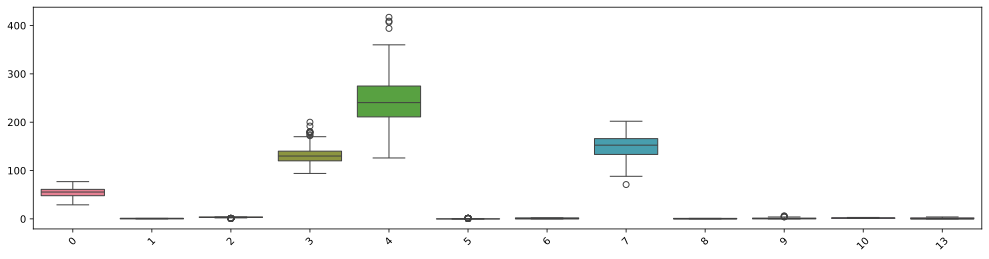

In [ ]:
data = data[data[4]<500] # drop a few outliers

# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [ ]:
#data = data.apply(pd.to_numeric, errors='coerce')

# z-score all columns except for quality
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop([1,5,8,13])
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)
data

<ipython-input-200-13dd324a458c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols2zscore] = data[cols2zscore].apply(stats.zscore)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.942285,1.0,-2.237510,0.747060,-0.273149,1.0,1.013652,0.019003,0.0,1.069137,2.264087,-0.723832,0.660262,0
1,1.385714,1.0,0.871893,1.592788,0.816946,0.0,1.013652,-1.812373,1.0,0.382849,0.645320,2.473994,-0.890830,2
2,1.385714,1.0,0.871893,-0.662487,-0.355421,0.0,1.013652,-0.896685,1.0,1.326494,0.645320,1.408052,1.177293,1
3,-1.939999,1.0,-0.164574,-0.098668,0.076504,0.0,-1.000046,1.632359,0.0,2.098568,2.264087,-0.723832,-0.890830,0
4,-1.496571,0.0,-1.201042,-0.098668,-0.869617,0.0,1.013652,0.978296,0.0,0.297063,-0.973448,-0.723832,-0.890830,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.277143,0.0,0.871893,0.465150,-0.108607,0.0,-1.000046,-1.158310,1.0,-0.732369,0.645320,-0.723832,1.177293,1
298,-1.053142,1.0,-2.237510,-1.226306,0.364454,0.0,-1.000046,-0.765872,0.0,0.125491,0.645320,-0.723832,1.177293,1
299,1.496571,1.0,0.871893,0.690678,-1.095863,1.0,-1.000046,-0.373435,0.0,2.012782,0.645320,1.408052,1.177293,2
300,0.277143,1.0,0.871893,-0.098668,-2.371069,0.0,-1.000046,-1.507144,1.0,0.125491,0.645320,0.342110,1.177293,3


<ipython-input-201-04f5da1670bb>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


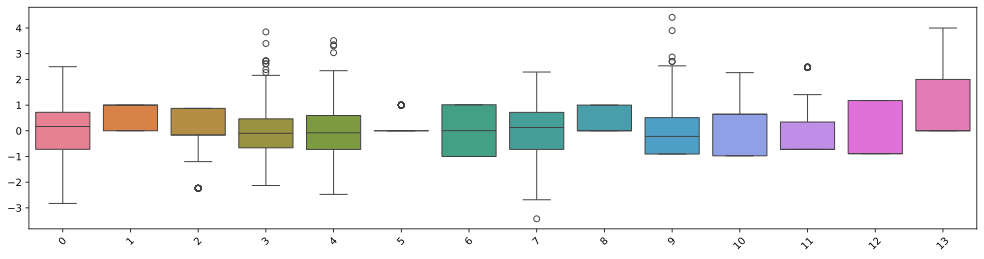

In [ ]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.942285,1.0,-2.237510,0.747060,-0.273149,1.0,1.013652,0.019003,0.0,1.069137,2.264087,-0.723832,0.660262,0
1,1.385714,1.0,0.871893,1.592788,0.816946,0.0,1.013652,-1.812373,1.0,0.382849,0.645320,2.473994,-0.890830,2
2,1.385714,1.0,0.871893,-0.662487,-0.355421,0.0,1.013652,-0.896685,1.0,1.326494,0.645320,1.408052,1.177293,1
3,-1.939999,1.0,-0.164574,-0.098668,0.076504,0.0,-1.000046,1.632359,0.0,2.098568,2.264087,-0.723832,-0.890830,0
4,-1.496571,0.0,-1.201042,-0.098668,-0.869617,0.0,1.013652,0.978296,0.0,0.297063,-0.973448,-0.723832,-0.890830,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.277143,0.0,0.871893,0.465150,-0.108607,0.0,-1.000046,-1.158310,1.0,-0.732369,0.645320,-0.723832,1.177293,1
298,-1.053142,1.0,-2.237510,-1.226306,0.364454,0.0,-1.000046,-0.765872,0.0,0.125491,0.645320,-0.723832,1.177293,1
299,1.496571,1.0,0.871893,0.690678,-1.095863,1.0,-1.000046,-0.373435,0.0,2.012782,0.645320,1.408052,1.177293,2
300,0.277143,1.0,0.871893,-0.098668,-2.371069,0.0,-1.000046,-1.507144,1.0,0.125491,0.645320,0.342110,1.177293,3


In [ ]:
# convert from pandas dataframe to tensor
FullDataT  = torch.tensor( data.values ).float()

In [ ]:
FullDataT
FullDataT[:, -1] = (FullDataT[:, -1] > 0).float()
dataT = FullDataT[:,:-1]
labels = FullDataT[:,-1]
labels = labels[:,None] # transform to matrix

In [ ]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=50, shuffle=True)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_dataDataset = TensorDataset(train_data,train_labels)
test_dataDataset  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_dataDataset,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_dataDataset,batch_size=test_dataDataset.tensors[0].shape[0])

In [ ]:
# create a class for the model

class ANNHealth(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(13,32)

    ### hidden layers
    self.fc1 = nn.Linear(32,64)
    self.bnorm1 = nn.BatchNorm1d(64) # the number of units into this layer
    self.fc2 = nn.Linear(64,32)
    self.bnorm2 = nn.BatchNorm1d(32) # the number of units into this layer

    ### output layer
    self.output = nn.Linear(32,1)

  # forward pass
  def forward(self,x):
    x = F.relu( self.input(x) )
    x = F.relu( self.fc1(x) ) # fully connected
    x = self.bnorm1(x) # batchnorm
    x = F.relu( self.fc2(x) )
    x = self.bnorm2(x) # batchnorm
    return self.output(x)

In [ ]:
numepochs = 100

def trainTheModel():

  # loss function and optimizer
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.Adam(healthnet.parameters(),lr=.01)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    healthnet.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = healthnet(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    healthnet.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = healthnet(X)
    testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )

  # function output
  return trainAcc,testAcc,losses

In [ ]:
  # create and train a model
  healthnet = ANNHealth()
  trainAcc,testAcc,losses = trainTheModel()

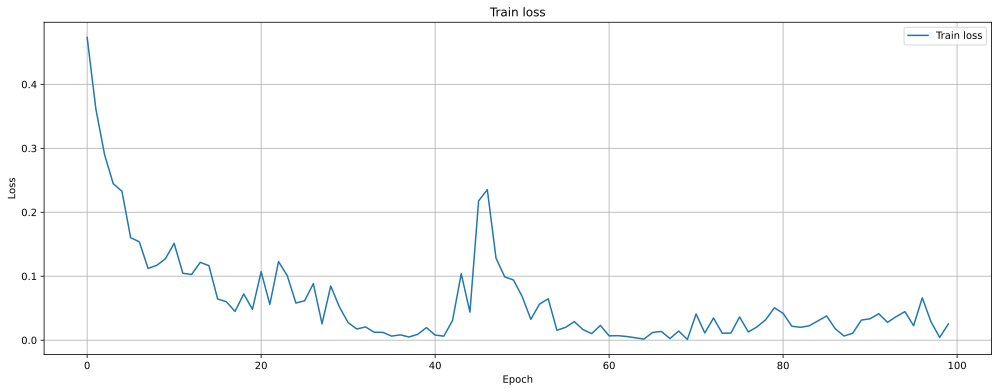

In [ ]:
# plot some results
fig,ax = plt.subplots(1,1,figsize=(17,6))

ax.plot(losses,label='Train loss')
ax.set_title('Train loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.grid()

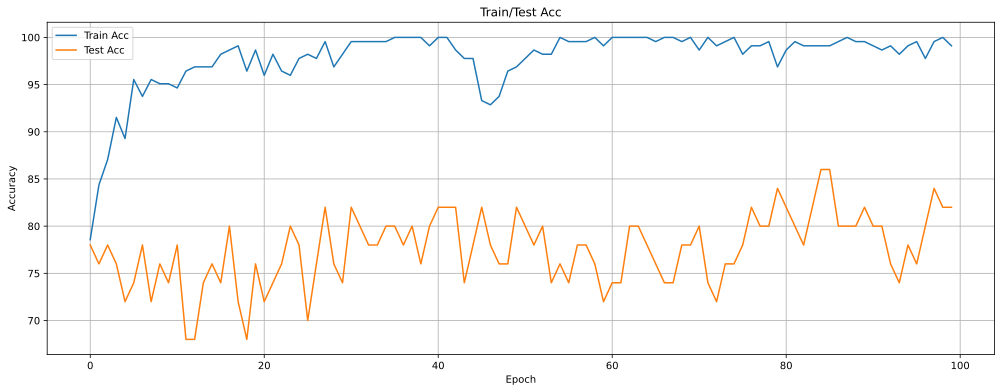

In [ ]:
# plot some results
fig,ax = plt.subplots(1,1,figsize=(17,6))

ax.plot(trainAcc,label='Train Acc')
ax.plot(testAcc,label='Test Acc')
ax.set_title('Train/Test Acc')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid()